# Predictive Risk Scoring - Risk Modelling

The goal of this project is to predictively score the risk of heart disease in an individual. 

## Describing the Dataset

The dataset was obtained from Kaggle, and consists of 10,000 rows.

In [92]:
df = pd.read_json("data.json")
display(df.head())

age  weight sex  height  sys_bp smoker nic_other  num_meds  occup_danger  \
0  100     219   m      74     136      n         n         0             1   
1   66     242   m      73     111      n         n         0             1   
2   31     197   f      65     112      n         n         7             1   
3   42     244   f      69     127      n         n         1             2   
4   93     183   f      63      91      y         n         2             3   

   ls_danger  ... addiction major_surgery_num diabetes  hds cholesterol  \
0          1  ...         n                 0        n    y         203   
1          1  ...         y                 0        n    n         228   
2          2  ...         y                 3        n    y         183   
3          3  ...         n                 2        n    y         228   
4          3  ...         y                 2        n    n         169   

   asthma immune_defic family_cancer  family_heart_disease family_cholesterol  
0       n            n             y                     n                  y  
1       n            n             n                     n                  n  
2       n            n             n                     n                  n  
3       n            n             n                     n                  n  
4       n            n             n                     n                  n  

[5 rows x 24 columns]

In [95]:
display(df.describe())

age        weight        height        sys_bp      num_meds  \
count  10000.00000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      64.63570    214.725500     67.237100    126.482400      4.590500   
std       23.19368     35.624989      3.897127     14.279162      5.512372   
min       25.00000     97.000000     53.000000     67.000000      0.000000   
25%       46.00000    190.000000     64.000000    117.000000      0.000000   
50%       64.00000    214.000000     67.000000    126.000000      3.000000   
75%       82.00000    238.000000     70.000000    136.000000      7.000000   
max      120.00000    366.000000     82.000000    180.000000     53.000000   

       occup_danger   ls_danger  drinks_aweek  major_surgery_num   cholesterol  
count  10000.000000  10000.0000  10000.000000       10000.000000  10000.000000  
mean       1.996800      2.0056      9.983400           4.170900    199.736100  
std        0.819425      0.8166      5.556601           2.964013     35.633212  
min        1.000000      1.0000      0.000000           0.000000     83.000000  
25%        1.000000      1.0000      6.000000           2.000000    175.000000  
50%        2.000000      2.0000      9.000000           4.000000    199.000000  
75%        3.000000      3.0000     13.000000           6.000000    223.000000  
max        3.000000      3.0000     37.000000          16.000000    351.000000

## Visualizing the Data

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_json('data.json')
sns.set(style='whitegrid')

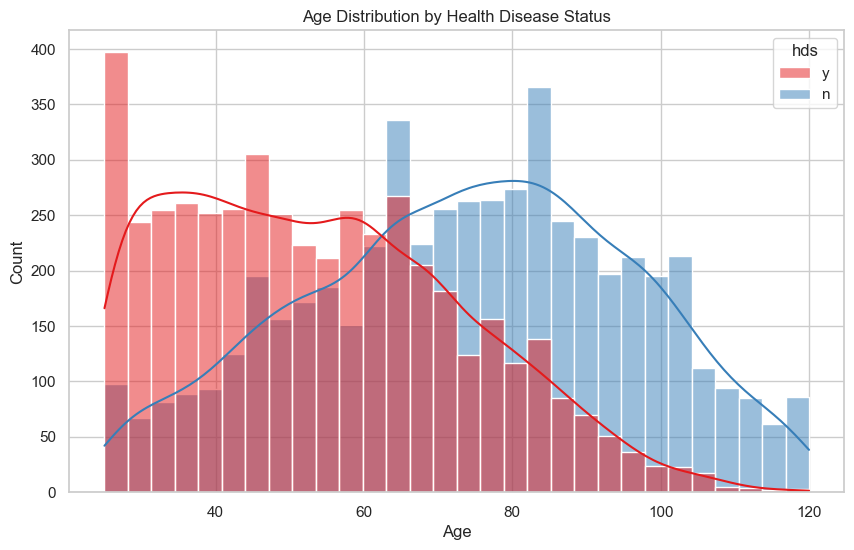

In [102]:
# 1. Age distribution by health disease status (hds)
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='age', hue='hds', kde=True, palette='Set1', bins=30)
plt.title('Age Distribution by Health Disease Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

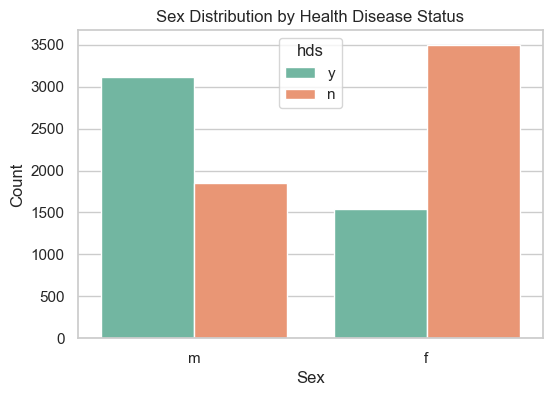

In [103]:
# 2. Sex distribution by health disease status
plt.figure(figsize=(6,4))
sns.countplot(x='sex', hue='hds', data=df, palette='Set2')
plt.title('Sex Distribution by Health Disease Status')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

/var/folders/68/7k4yhjwn6hz02wv392bx_2b80000gn/T/ipykernel_17586/3021393648.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hds', y='cholesterol', data=df, palette='pastel')


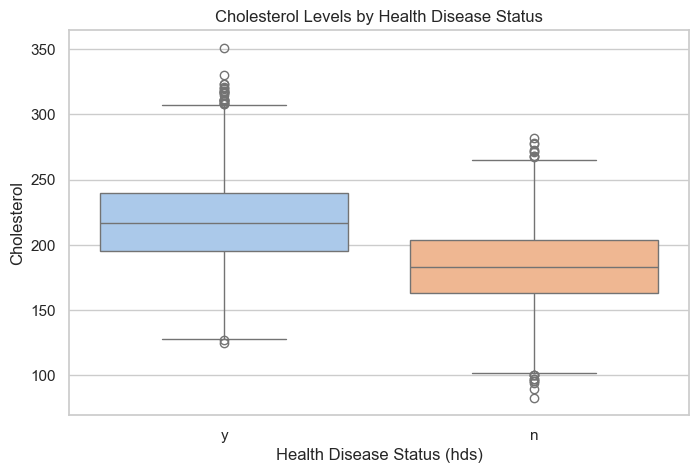

In [104]:
# 3. Cholesterol levels by health disease status (boxplot)
plt.figure(figsize=(8,5))
sns.boxplot(x='hds', y='cholesterol', data=df, palette='pastel')
plt.title('Cholesterol Levels by Health Disease Status')
plt.xlabel('Health Disease Status (hds)')
plt.ylabel('Cholesterol')
plt.show()

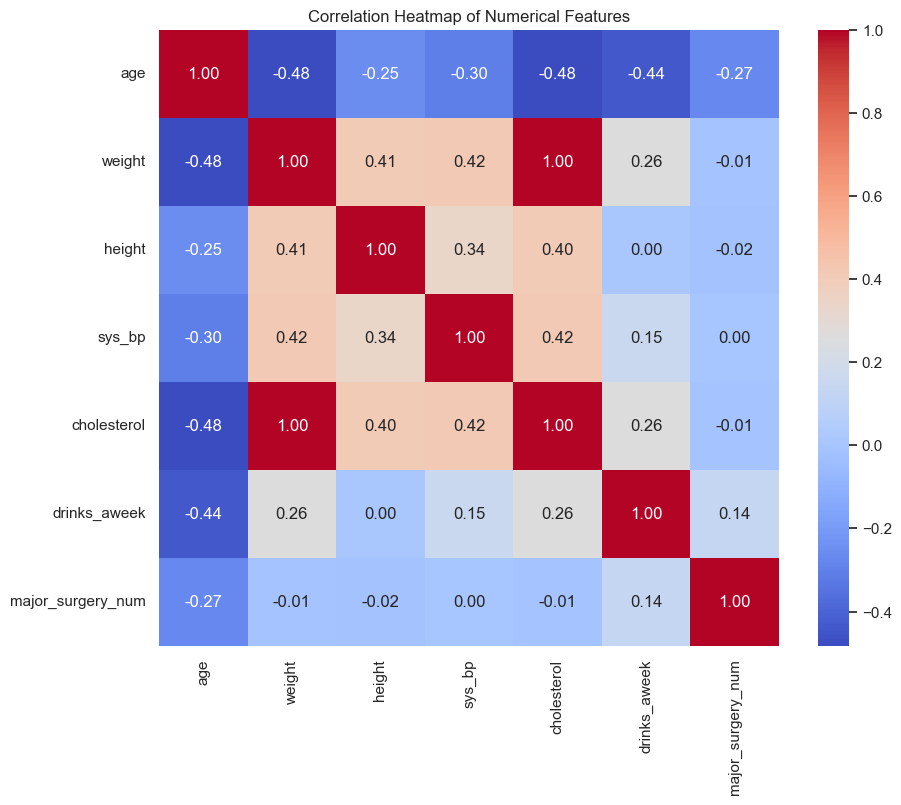

In [105]:
# 4. Correlation heatmap of selected numerical features
num_features = ['age', 'weight', 'height', 'sys_bp', 'cholesterol', 'drinks_aweek', 'major_surgery_num']
plt.figure(figsize=(10,8))
corr = df[num_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

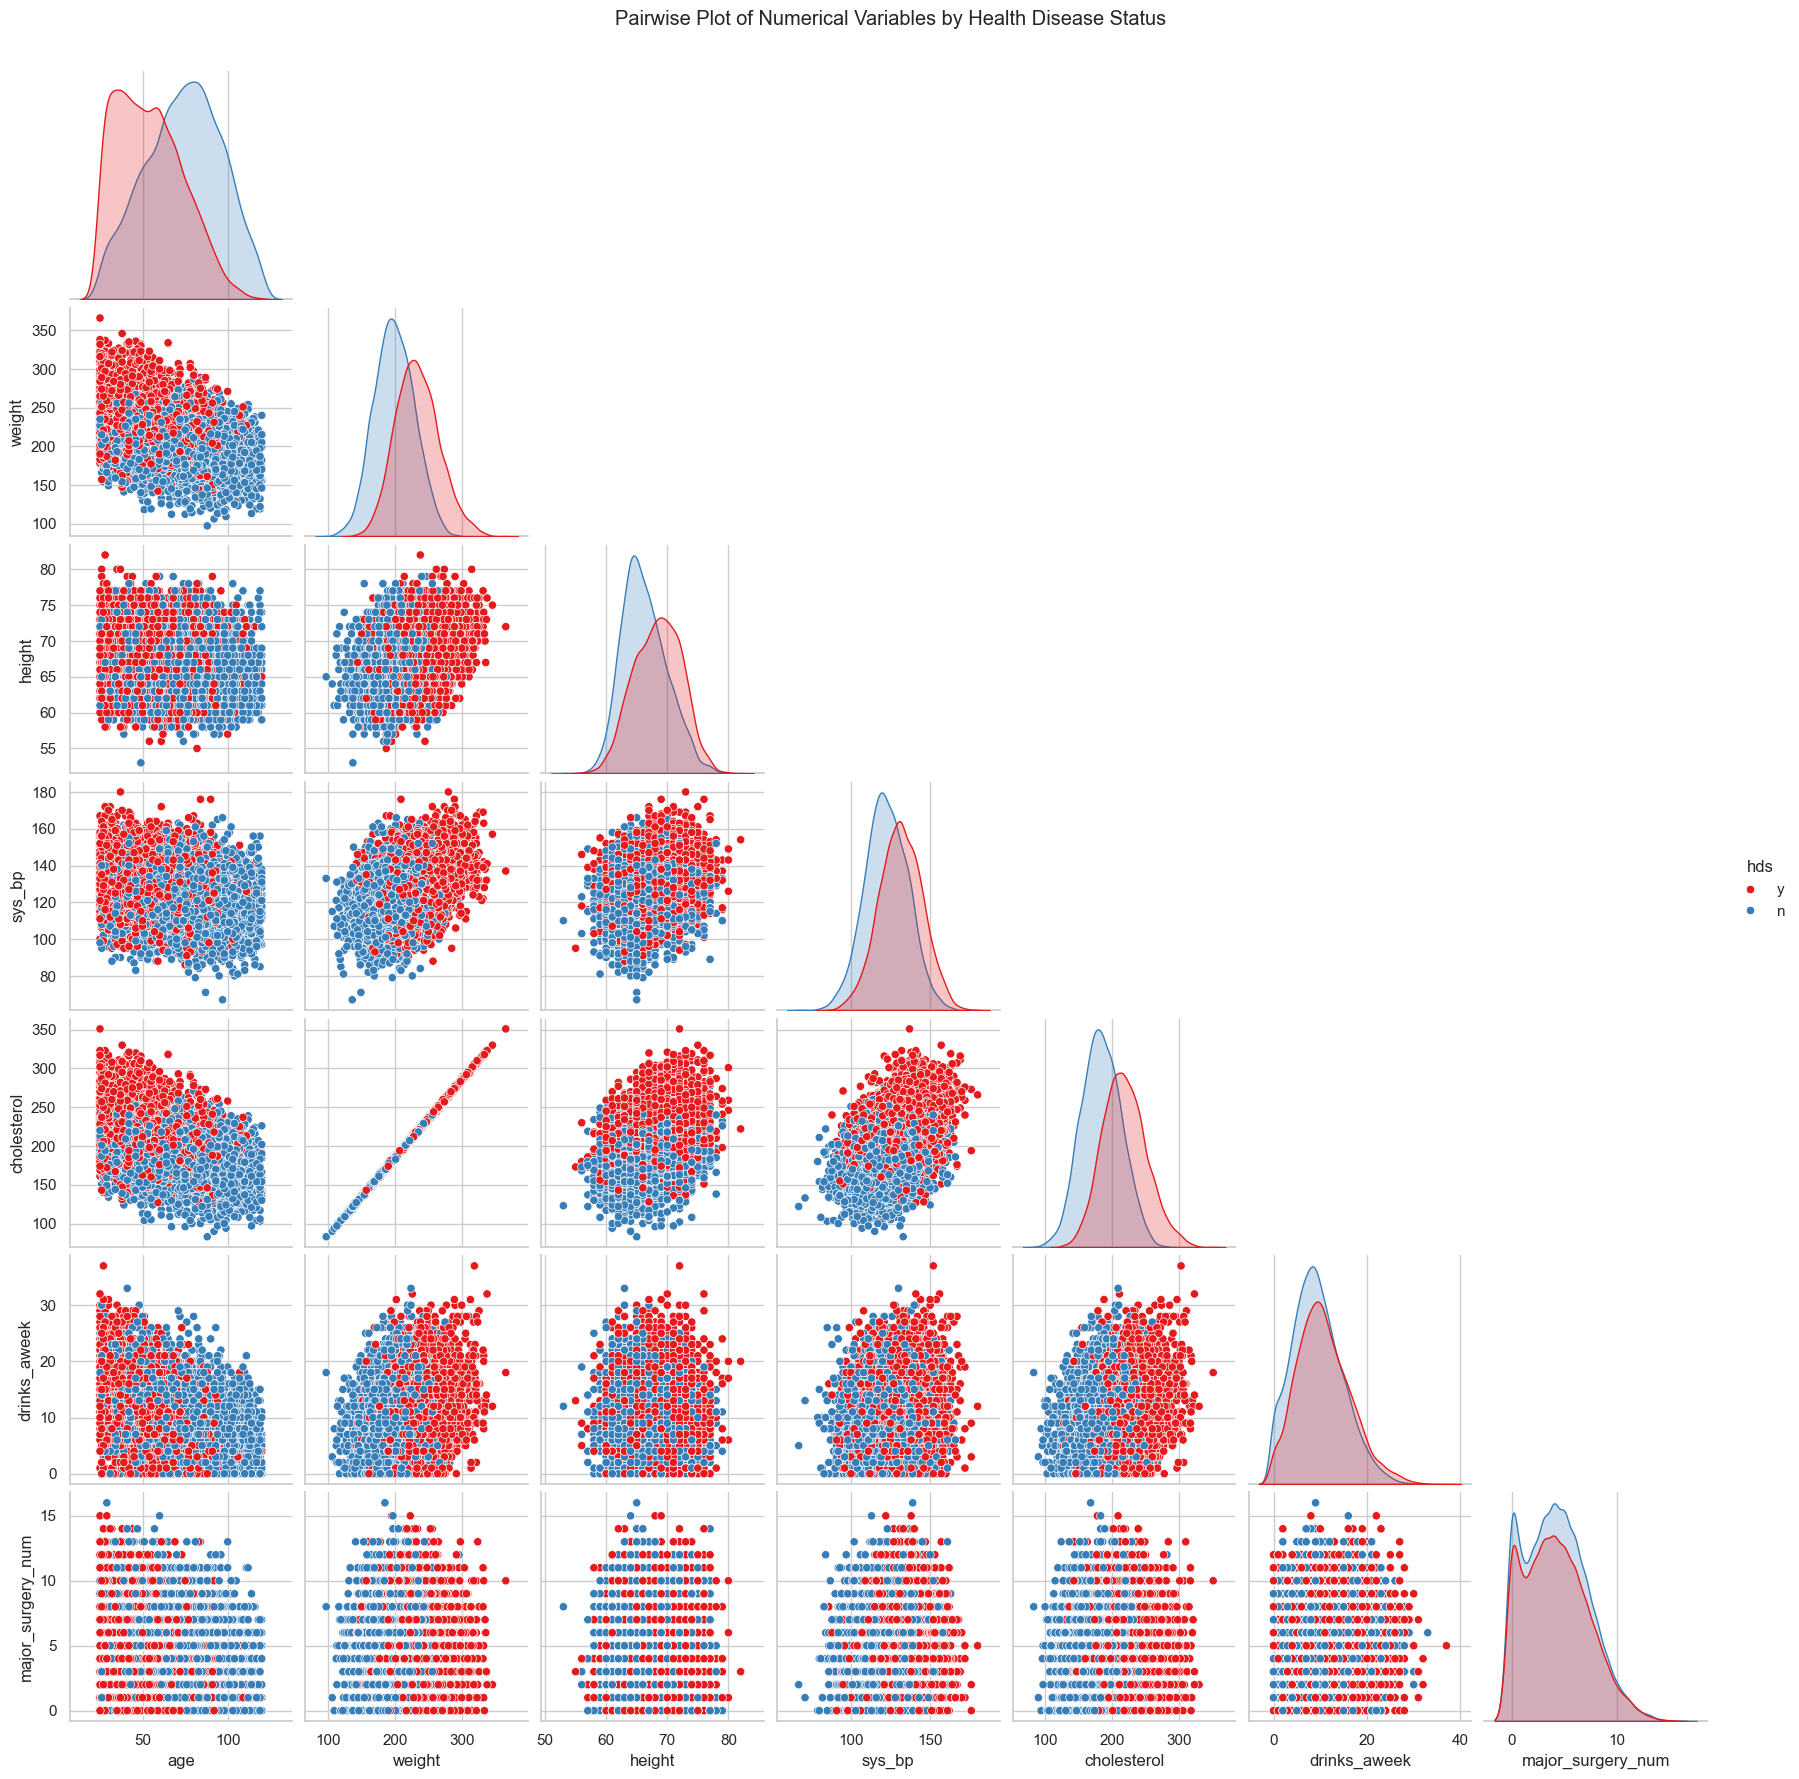

In [110]:
# 5. Pairplot of numerical variables colored by health disease status
sns.pairplot(df[num_features + ['hds']], hue='hds', corner=True, diag_kind='kde', palette='Set1')
plt.suptitle('Pairwise Plot of Numerical Variables by Health Disease Status', y=1.02)
plt.show()

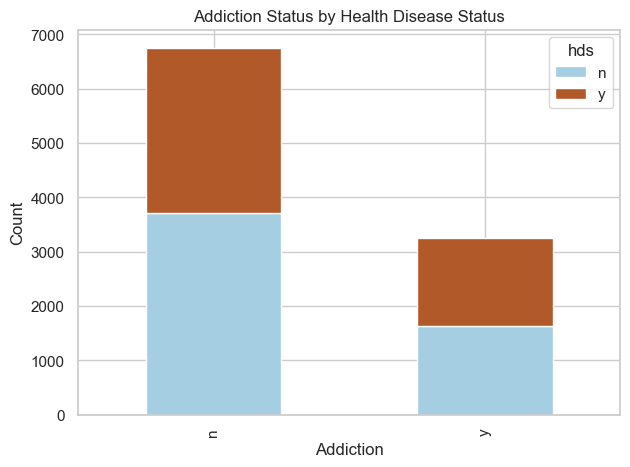

In [107]:
# 6. Stacked bar chart for addiction by health disease status
addiction_counts = df.groupby(['addiction', 'hds']).size().unstack().fillna(0)
addiction_counts.plot(kind='bar', stacked=True, figsize=(7,5), colormap='Paired')
plt.title('Addiction Status by Health Disease Status')
plt.xlabel('Addiction')
plt.ylabel('Count')
plt.show()

/var/folders/68/7k4yhjwn6hz02wv392bx_2b80000gn/T/ipykernel_17586/2546053192.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='sys_bp', data=df, palette='Set3')


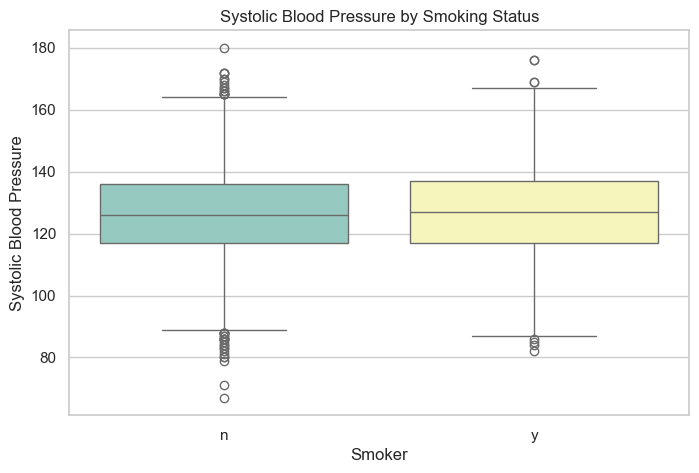

In [111]:
# 7. Systolic blood pressure by smoking status (boxplot)
plt.figure(figsize=(8,5))
sns.boxplot(x='smoker', y='sys_bp', data=df, palette='Set3')
plt.title('Systolic Blood Pressure by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Systolic Blood Pressure')
plt.show()

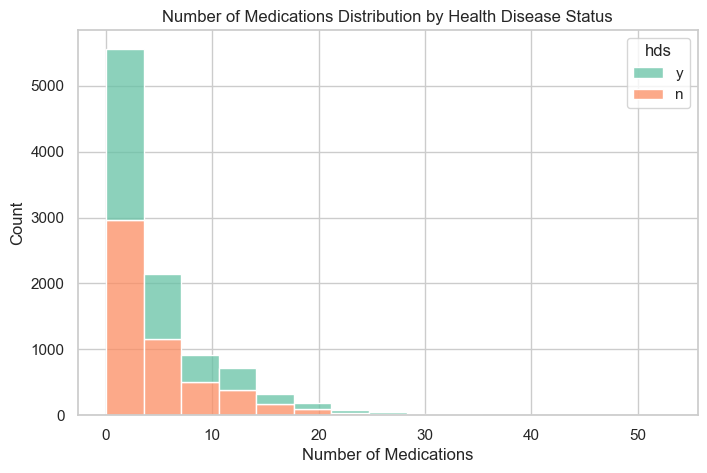

In [109]:
# 8. Number of medications distribution by health disease status
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='num_meds', hue='hds', multiple='stack', bins=15, palette='Set2')
plt.title('Number of Medications Distribution by Health Disease Status')
plt.xlabel('Number of Medications')
plt.ylabel('Count')
plt.show()

## Finding the Best Model for the Dataset

### Random Forest Classifier

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

df = pd.read_json("data.json")

target = 'hds'
cat_cols = ['sex', 'smoker', 'nic_other', 'cannabis', 'opioids', 'other_drugs', 'addiction', 
            'diabetes', 'hds', 'asthma', 'immune_defic', 'family_cancer', 'family_heart_disease', 
            'family_cholesterol']

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

features = df.columns.drop(target)

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred_proba = clf.predict_proba(X_test)[:,1]
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1633
           1       0.72      0.69      0.70      1367

    accuracy                           0.74      3000
   macro avg       0.73      0.73      0.73      3000
weighted avg       0.73      0.74      0.73      3000



### Using XGBoost

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

df = pd.read_json("data.json")

target = 'hds'
cat_cols = ['sex', 'smoker', 'nic_other', 'cannabis', 'opioids', 'other_drugs', 'addiction', 
            'diabetes', 'hds', 'asthma', 'immune_defic', 'family_cancer', 'family_heart_disease', 
            'family_cholesterol']

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

features = df.columns.drop(target)
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3, random_state=42)

xgb = XGBClassifier(eval_metric='logloss', random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid = GridSearchCV(xgb, param_grid, scoring='f1', cv=3)
grid.fit(X_train, y_train)

y_pred = grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77      1633
           1       0.74      0.71      0.72      1367

    accuracy                           0.75      3000
   macro avg       0.75      0.75      0.75      3000
weighted avg       0.75      0.75      0.75      3000



### Using LightGBM

In [62]:
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

df = pd.read_json('data.json')

cat_cols = ['sex', 'smoker', 'nic_other', 'cannabis', 'opioids', 'other_drugs', 'addiction',
            'diabetes', 'hds', 'asthma', 'immune_defic', 'family_cancer', 'family_heart_disease',
            'family_cholesterol']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

target = 'hds'
features = df.columns.drop(target)
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3, random_state=42)

lgbm = LGBMClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid = GridSearchCV(lgbm, param_grid, scoring='f1', cv=3)
grid.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 2190, number of negative: 2476
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000800 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 698
[LightGBM] [Info] Number of data points in the train set: 4666, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.469353 -> initscore=-0.122743
[LightGBM] [Info] Start training from score -0.122743
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

GridSearchCV(cv=3, estimator=LGBMClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200]},
             scoring='f1')

In [65]:
y_pred = grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78      1633
           1       0.74      0.71      0.72      1367

    accuracy                           0.75      3000
   macro avg       0.75      0.75      0.75      3000
weighted avg       0.75      0.75      0.75      3000



### Stacking / Ensembling

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report

df = pd.read_json('data.json')
cat_cols = ['sex', 'smoker', 'nic_other', 'cannabis', 'opioids', 'other_drugs', 'addiction',
            'diabetes', 'hds', 'asthma', 'immune_defic', 'family_cancer', 'family_heart_disease',
            'family_cholesterol']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))
target = 'hds'
features = df.columns.drop(target)
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3, random_state=42)

In [47]:
estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(eval_metric='logloss', random_state=42)),
    ('lgbm', LGBMClassifier(random_state=42))
]
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=3)
stack.fit(X_train, y_train)
y_pred_stack = stack.predict(X_test)

[LightGBM] [Info] Number of positive: 3285, number of negative: 3715
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000763 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.469286 -> initscore=-0.123012
[LightGBM] [Info] Start training from score -0.123012
[LightGBM] [Info] Number of positive: 2190, number of negative: 2476
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000759 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 698
[LightGBM] [Info] Number of data points in the train set: 4666, number of used features: 23
[LightGBM] [Info] [binary:

In [49]:
print("Stacking Classifier Results:")
print(classification_report(y_test, y_pred_stack))

Stacking Classifier Results:
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1633
           1       0.73      0.70      0.72      1367

    accuracy                           0.75      3000
   macro avg       0.74      0.74      0.74      3000
weighted avg       0.74      0.75      0.74      3000



### Neural Networks

In [66]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

nn_eval = model.evaluate(X_test, y_test, verbose=0)
print(f"Neural Network Accuracy: {nn_eval[1]:.4f}")

y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")
print("Neural Network Results:")
print(classification_report(y_test, y_pred_nn))

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neural Network Accuracy: 0.7470
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step
Neural Network Results:
              precision    recall  f1-score   support

           0       0.73      0.85      0.78      1633
           1       0.77      0.63      0.69      1367

    accuracy                           0.75      3000
   macro avg       0.75      0.74      0.74      3000
weighted avg       0.75      0.75      0.74      3000



## Summary of Model Fitting

Even after all the attempts to increase accuracy, the best value is 75%. The best model to proceed with is LightGBM, because it gives a good balance between accuracy, speed, and resource usage, which is helpful during deployment and real-time risk scoring.

## Implementing the LightGBM Model into Risk Scoring Algorithm

### Importing Libraries

In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMClassifier

### Pre-processing the Dataset

In [71]:
df = pd.read_json('data.json')
cat_cols = ['sex', 'smoker', 'nic_other', 'cannabis', 'opioids', 'other_drugs', 'addiction',
            'diabetes', 'hds', 'asthma', 'immune_defic', 'family_cancer', 'family_heart_disease',
            'family_cholesterol']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

target = 'hds'
features = df.columns.drop(target)
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3, random_state=42)

### Training the Model

In [72]:
# Train LightGBM model
model = LGBMClassifier(random_state=42)
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 3285, number of negative: 3715
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001866 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 731
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.469286 -> initscore=-0.123012
[LightGBM] [Info] Start training from score -0.123012


LGBMClassifier(random_state=42)

### Risk Scoring Logic

In [81]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
risk_scores = np.round(y_pred_proba * 100, 2)

### Creating a DataFrame showing risk score alongside true label

In [83]:
risk_df = X_test.copy()
risk_df['true_label'] = y_test.values
risk_df['risk_score'] = risk_scores

print(risk_df[['risk_score', 'true_label']].head())

      risk_score  true_label
6252       25.34           0
4684       63.31           1
1731        9.00           0
4742       43.74           1
4521       97.51           1


### Defining the `get_risk_score` function for New Data Points

In [84]:
def get_risk_score(single_data_point):
    prob = model.predict_proba(single_data_point)[:, 1][0]
    score = round(prob * 100, 2)
    return score